<a href="https://colab.research.google.com/github/kaish114/Elucidata-Assignment-Internship/blob/master/Elucidata_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Elucidata Internship Assignment**

#1. Introduction

In 2017, the World Health Assembly passed the resolution Cancer Prevention and Control through an Integrated Approach (WHA70.12) urges governments and WHO to accelerate action to achieve the targets specified in the Global Action Plan and 2030 UN Agenda for Sustainable Development to reduce premature mortality from cancer. 
* [WHA70.12:  Cancer prevention and control in the context of an integrated approach](http://apps.who.int/gb/ebwha/pdf_files/WHA70-REC1/A70_2017_REC1-en.pdf#page=27)

* [Global action plan for the prevention and control of NCDs 2013-2020](http://www.who.int/entity/nmh/publications/ncd-action-plan/en/index.html)


Data Analysis of the **cancers patient** based on their **genes structure**.

### Cancers


1. Cancer arises from the transformation of normal cells into tumour cells in a multistage process that generally progresses from a pre-cancerous lesion to a malignant tumour. 

1. WHO, through its cancer research agency, International Agency for Research on Cancer (IARC), maintains a classification of cancer-causing agents.

1. Cancer is a leading cause of death worldwide, accounting for an estimated 9.6 million deaths in 2018. The most common cancers are:
 * Lung (2.09 million cases)
 * Breast (2.09 million cases)
 * Colorectal (1.80 million cases)
 * Prostate (1.28 million cases)
 * Skin cancer (non-melanoma) (1.04 million cases)
 * Stomach (1.03 million cases)

1. The most common causes of cancer death are cancers of:
  * Lung (1.76 million deaths)
  * Colorectal (862 000 deaths)
  * Stomach (783 000 deaths)
  * Liver (782 000 deaths)
  * Breast (627 000 deaths)




5. **Pancreatic Adenocarcinoma (PAAD)** is the third most common cause of death from cancer, with an overall 5-year survival rate of less than 5%, and is predicted to become the second leading cause of cancer mortality in the United States by 2030.

1. Cancer mortality can be reduced if cases are detected and treated early. In this assignment we are going to analyse the previous data of **genes structure** to detect the cancer patient and provide early treatment.

1. **Genes Structures**: **Ribonucleic acid (RNA)** is a polymeric molecule essential in various biological roles in coding, decoding, regulation and expression of genes. RNA and DNA are nucleic acids, and, along with lipids, proteins and carbohydrates, constitute the four major macromolecules essential for all known forms of life. **RNA-Seq (RNA sequencing)**, is a sequencing technique to detect the quantity of RNA in a biological sample at a given moment.

###Pursue prevention strategies

To prevent cancer, people may:

    increase avoidance of the risk factors;
    vaccinate against HPV and hepatitis B virus;
    control occupational hazards;
    reduce exposure to ultraviolet radiation;
    reduce exposure to ionizing radiation (occupational or medical diagnostic imaging).

Vaccination against these HPV and hepatitis B viruses could prevent 1 million cancer cases each year3.


#2. Importing Important Libraries

In [0]:
#Importing Important Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization, plotting graphs
import seaborn as sns

In [11]:
#Python Version
!python --version

Python 3.6.9


In [12]:
# Installing and importing the python 'package' ​cmapPy​ that will be used for reading GCTs in python
!pip install cmapPy
from cmapPy.pandasGEXpress.parse import parse
import cmapPy.pandasGEXpress.parse_gct as pg

#3. Data Exploration And Analysis

* Here we have a dataset of normalized RNA Sequencing reads for pancreatic cancer tumors. The measurement consists of ~20,000 genes for 185 pancreatic cancer tumors. The **file format is GCT** , a tab-delimited file used for sharing gene expression data and metadata (details for each sample) for samples.
* **GCT file:** The GCT file format, a tab-delimited text-based format pairing matrix expression values with row and column metadata, allowing comparison of both transcriptional and contextual differences across samples. A schematic of a sample GCT file is pictured below.
![gct data format](https://www.genepattern.org/uploaded/content_file_gct_format_snapshot.gif)

[More about GCT File Format](https://clue.io/connectopedia/gct_format)



### Load Dataset

Let's dive into data, and explore it.

In [0]:
#Loading Dataset for Exploration

data = parse('PAAD.gct')

In [14]:
#Type of dataset
print(type(data))

<class 'cmapPy.pandasGEXpress.GCToo.GCToo'>


Here we parse our dataset into GCToo pandas dataframe instance which contains 3 component dataframes (row_metadata_df, column_metadata_df, and data_df). Lets see individual dataframe and explore it. 
We have:
* row_metadata_df
* column_metadata_df
* data_df


In [0]:
# Read all portion of data
col_meta_data = data.col_metadata_df #col_metadata
row_meta_data = data.row_metadata_df #row_metadata
my_data = data.data_df #data_matrix

Considering only Columns meta data

In [16]:
# Columns meta data
#First five rows
col_meta_data.head()

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,alcohol_history_documented,alcoholic_exposure_category,amount_of_alcohol_consumption_per_day,anatomic_neoplasm_subdivision,anatomic_neoplasm_subdivision_other,b_symptoms,bcr,bcr_aliquot_uuid,bcr_canonical_reason-2,bcr_canonical_reason-3,bcr_canonical_reason,bcr_followup_barcode,bcr_followup_uuid,bcr_patient_canonical_status,clinical_m,clinical_n,clinical_stage,clinical_t,course_number,day_of_dcc_upload,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_index,days_to_initial_pathologic_diagnosis,days_to_pancreatitis_onset,days_to_psa,disease_code,drugs,...,person_neoplasm_cancer_status,prescribed_dose,prescribed_dose_units,primary_lymph_node_presentation_assessment,primary_pattern,primary_therapy_outcome_success,progression_determined_by-3,project_code,psa_value,race,radiation_therapy,radiation_type_notes,radiations,regimen_number,relative_cancer_type-2,relative_cancer_type,residual_tumor,route_of_administration,secondary_pattern,serum_markers,source_of_patient_death_reason,stopped_smoking_year,surgery_performed_type,system_version,targeted_molecular_therapy,tertiary_pattern,therapy_type_notes,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,tissue_source_site,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,NaN,yes,65,yes,weekly drinker,1.0,head of pancreas,NaN,NaN,nationwide children's hospital,d3f960b2-c69d-4b64-a30f-72f4fa7bb2f9,NaN,NaN,NaN,NaN,NaN,canonical,NaN,NaN,NaN,NaN,NaN,21,5,-23962,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,complete remission/response,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,medical record,1988.0,whipple,7,yes,NaN,NaN,no,yes,2j,3.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,1962.0
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,NaN,yes,48,no,NaN,NaN,other (please specify),body & tail of pancreas,NaN,nationwide children's hospital,9daae9d7-747e-44e0-a8f8-3c3f9e3f03f3,NaN,NaN,NaN,tcga-2j-aab4-f62444,ce0b8128-82b9-4164-808f-1b4447134f54,canonical,NaN,NaN,NaN,NaN,NaN,21,16,-17794,NaN,0.0,0.0,-292.0,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,complete remission/response,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,NaN,NaN,distal pancreatectomy,7,yes,NaN,NaN,no,yes,2j,5.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,NaN,yes,75,no,NaN,NaN,body of pancreas,NaN,NaN,nationwide children's hospital,c850368e-6e95-4879-8245-205ddeec6fbd,NaN,NaN,NaN,NaN,NaN,canonical,NaN,NaN,NaN,NaN,NaN,21,5,-27600,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,with tumor,NaN,NaN,yes,NaN,progressive disease,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,medical record,NaN,distal pancreatectomy,7,yes,NaN,NaN,no,yes,2j,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab8-Primary solid Tumor,aab8,Primary solid Tumor,1.0,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NaN,80.0,NaN,yes,71,no,NaN,NaN,head of pancreas,NaN,NaN,nationwide children's hospital,5749429c-5ac9-40de-b44e-3b795520ec07,NaN,NaN,NaN,tcga-2j-aab8-f62434,daf7d897-0ed7-48ec-ae70-080dd8d7d6bd,canonical,NaN,NaN,NaN,NaN,NaN,21,16,-26028,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,NaN,NaN,tcga,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,r1,NaN,NaN,NaN,NaN,NaN,whipple,7,yes,NaN,NaN,no,yes,2j,NaN,NaN,NaN,panc

In [17]:
# Shape of columns metadata
col_meta_data.shape

(183, 124)

Total 86 columns have missing value, and Total 9659 missing values in dataset


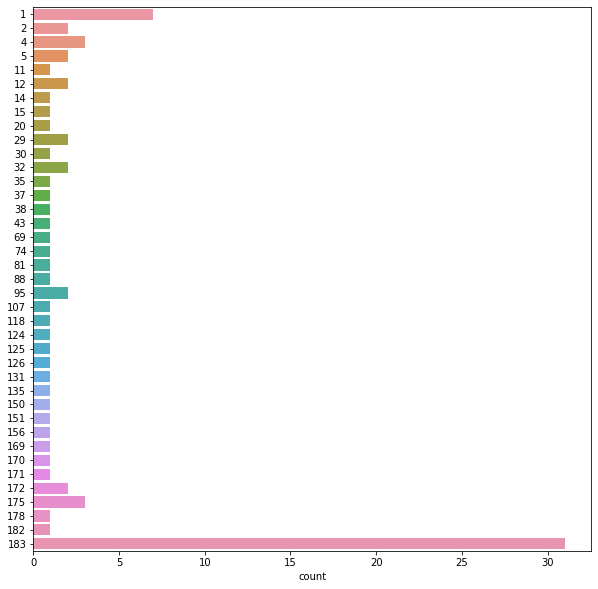

In [20]:
# Number of missing values in each column of col_meta_data
missing_val = (col_meta_data.isnull().sum())
missing_val_col = missing_val[missing_val > 0].sort_values(ascending=False)
print(f"Total {len(missing_val_col)} columns have missing value, and",
      f"Total {col_meta_data.isnull().sum().sum()} missing values in dataset")
plt.figure(figsize=(10, 10))
sns.countplot(data=missing_val_col, y= missing_val_col )

In [0]:
# Explore each columns of col_meatadata
for col in col_meta_data.columns:
    print(f"{col}:   {len(col_meta_data[col].unique())} unique values:")

participant_id:   178 unique values:
sample_type:   3 unique values:
mRNAseq_cluster:   6 unique values:
bcr_patient_barcode:   178 unique values:
bcr_patient_uuid:   178 unique values:
vital_status:   2 unique values:
days_to_death:   90 unique values:
days_to_last_followup:   85 unique values:
additional_studies:   1 unique values:
adenocarcinoma_invasion:   2 unique values:
age_at_initial_pathologic_diagnosis:   45 unique values:
alcohol_history_documented:   3 unique values:
alcoholic_exposure_category:   6 unique values:
amount_of_alcohol_consumption_per_day:   7 unique values:
anatomic_neoplasm_subdivision:   4 unique values:
anatomic_neoplasm_subdivision_other:   11 unique values:
b_symptoms:   1 unique values:
bcr:   1 unique values:
bcr_aliquot_uuid:   178 unique values:
bcr_canonical_reason-2:   2 unique values:
bcr_canonical_reason-3:   2 unique values:
bcr_canonical_reason:   4 unique values:
bcr_followup_barcode:   151 unique values:
bcr_followup_uuid:   151 unique values:

In [0]:
# drop columns which have constant value
for col in col_meta_data.columns:
    if len(col_meta_data[col].unique())<2:
        col_meta_data.drop(columns=col, inplace=True)


In [23]:
col_meta_data.shape #Initially it was (183, 124)

(183, 83)

Columns metadata explain about behaviour of patient. Lets see the description of some variables of this data.
* **sample_type** is our **target variable** which tells that which patient have cancer tumor or not.
* **participant_id** unique value for each patient.
* **mRNAseq_cluster**  estimates of the levels of individual isoforms within the cell of RNA sequence.
* **bcr_patient_barcode** and **bcr_patient_uuid** representing the metadata of the participants and their samples.
* **vital_status** Current status of patient(live/death). (may pose data leakage)
* **adenocarcinoma_invasion** Tells about cancer grows and spreads to near cell or not.
* **maximum_tumor_dimension** Size of Tumor, tumor size is strongly related to chances for survival.
* **pathologic_stage** Stage of cancer (amount or spread of cancer in the body)
* **pathologic_m** The M refers to whether the cancer has metastasized. This means that the cancer has spread from the primary tumor to other parts of the body
* **pathologic_n** The N refers to the the number of nearby lymph nodes that have cancer.
* **pathologic_t** The T refers to the size and extent of the main tumor. The main tumor is usually called the primary tumor.

Let's explore some variables:

In [24]:
# Columns meta data
col_meta_data.head()

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,alcohol_history_documented,alcoholic_exposure_category,amount_of_alcohol_consumption_per_day,anatomic_neoplasm_subdivision,anatomic_neoplasm_subdivision_other,bcr_aliquot_uuid,bcr_canonical_reason-2,bcr_canonical_reason-3,bcr_canonical_reason,bcr_followup_barcode,bcr_followup_uuid,bcr_patient_canonical_status,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_index,days_to_initial_pathologic_diagnosis,days_to_pancreatitis_onset,ethnicity,family_history_of_cancer,file_uuid,followup_case_report_form_submission_reason,followup_treatment_success,frequency_of_alcohol_consumption,gender,histologic_grading_tier_category,histological_type,histological_type_other,history_of_chronic_pancreatitis,history_of_diabetes,...,icd_o_3_histology,icd_o_3_site,init_pathology_dx_method_other,initial_pathologic_diagnosis_method,lost_follow_up,lymph_node_examined_count,maximum_tumor_dimension,mononucleotide_and_dinucleotide_marker_panel_analysis_status,month_of_form_completion,neoplasm_histologic_grade,number_of_lymphnodes_positive_by_he,number_of_lymphnodes_positive_by_ihc,number_pack_years_smoked,other_dx,pathologic_m,pathologic_n,pathologic_stage,pathologic_t,patient_death_reason,person_neoplasm_cancer_status,primary_lymph_node_presentation_assessment,primary_therapy_outcome_success,progression_determined_by-3,race,radiation_therapy,relative_cancer_type-2,relative_cancer_type,residual_tumor,source_of_patient_death_reason,stopped_smoking_year,surgery_performed_type,system_version,targeted_molecular_therapy,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,tissue_source_site,tobacco_smoking_history,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,yes,65,yes,weekly drinker,1.0,head of pancreas,NaN,d3f960b2-c69d-4b64-a30f-72f4fa7bb2f9,NaN,NaN,NaN,NaN,NaN,canonical,5,-23962,NaN,0.0,0.0,NaN,NaN,no,cda0d295-ea13-4065-9e5d-8177e827a8f6,NaN,NaN,3.0,male,four tier,pancreas-adenocarcinoma-other subtype,invasive adenocarcinoma,no,no,...,8480,c25.0,NaN,tumor resection,NaN,22.0,4.5,mss,7,g3,7.0,0.0,25.0,no,m0,n1,stage iib,t3,pancreatic cancer,tumor free,yes,complete remission/response,NaN,white,no,NaN,NaN,r0,medical record,1988.0,whipple,7,yes,no,yes,2j,3.0,2014,2012.0,1962.0
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,yes,48,no,NaN,NaN,other (please specify),body & tail of pancreas,9daae9d7-747e-44e0-a8f8-3c3f9e3f03f3,NaN,NaN,NaN,tcga-2j-aab4-f62444,ce0b8128-82b9-4164-808f-1b4447134f54,canonical,16,-17794,NaN,0.0,0.0,-292.0,NaN,NaN,d25a44b7-47b1-4a1b-ae08-7bd9aceab9c8,scheduled follow-up submission,NaN,NaN,male,four tier,pancreas-adenocarcinoma-other subtype,"invasive, well-differentiated",yes,no,...,8140,c25.8,NaN,tumor resection,no,34.0,6.8,mss,7,g2,0.0,0.0,NaN,no,m0,n1,stage iib,t2,NaN,tumor free,yes,complete remission/response,NaN,white,no,NaN,NaN,r0,NaN,NaN,distal pancreatectomy,7,yes,no,yes,2j,5.0,2014,2012.0,NaN
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,yes,75,no,NaN,NaN,body of pancreas,NaN,c850368e-6e95-4879-8245-205ddeec6fbd,NaN,NaN,NaN,NaN,NaN,canonical,5,-27600,NaN,0.0,0.0,NaN,NaN,NaN,6f72d859-d6af-4a35-8836-2e086684d90f,NaN,NaN,NaN,male,four tier,pancreas-adenocarcinoma ductal type,NaN,no,no,...,8500,c25.1,NaN,tumor resection,NaN,18.0,5.0,mss,7,g2,0.0,0.0,NaN,no,m0,n0,stage iia,t3,pancreatic cancer,with tumor,yes,progressive disease,NaN,white,no,NaN,NaN,r0,medical record,NaN,distal pancreatectomy,7,yes,no,yes,2j,NaN,201

In [25]:
col_meta_data.adenocarcinoma_invasion.value_counts()

yes    182
no       1
Name: adenocarcinoma_invasion, dtype: int64

No handles with labels found to put in legend.


RNA sequence cluster:3.0 types patient is 24.16% of total 
RNA sequence cluster:4.0 types patient is 22.47% of total 
RNA sequence cluster:1.0 types patient is 21.91% of total 
RNA sequence cluster:5.0 types patient is 16.85% of total 
RNA sequence cluster:2.0 types patient is 14.61% of total 


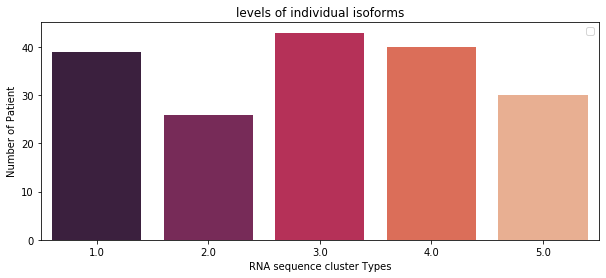

In [34]:
conts_mRNA = col_meta_data.mRNAseq_cluster.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=conts_mRNA.index,y=conts_mRNA.values,palette="rocket")
plt.ylabel('Number of Patient')
plt.xlabel('RNA sequence cluster Types')
plt.title('levels of individual isoforms')
plt.legend()
for i, index in enumerate(conts_mRNA.index):
    val = conts_mRNA.values[i]
    val_pcn = round(((val)/sum(conts_mRNA.values))*100, 2)
    print(f"RNA sequence cluster:{index} types patient is {val_pcn}% of total ")

Text(0.5, 1.0, 'Vital status of patient by mRNA sequence cluster types ')

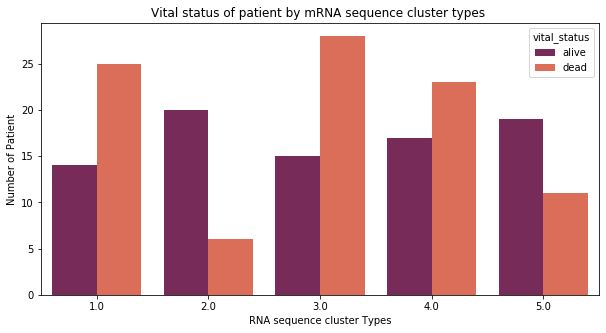

In [35]:
#Plotting RNA sequence cluster Types Vs Number of Patient Vs Vital_status

mRNA_seq_group = col_meta_data.groupby(['mRNAseq_cluster', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='mRNAseq_cluster', y='counts', hue='vital_status', data=mRNA_seq_group, palette="rocket")
plt.ylabel('Number of Patient')
plt.xlabel('RNA sequence cluster Types')
plt.title('Vital status of patient by mRNA sequence cluster types ')

In [28]:
#Exploring which RNA cluster type has caused how much death

for cluster_type in mRNA_seq_group.mRNAseq_cluster.unique():
    data = mRNA_seq_group[mRNA_seq_group.mRNAseq_cluster==cluster_type]
    live_pcn = round((data[data['vital_status']=='alive']['counts']
                      /sum(data.counts.values))*100, 2)
    dead_pcn = round((data[data['vital_status']=='dead']['counts']/
                     sum(data.counts.values))*100, 2)
    print(f"mRNAseq_cluster type {cluster_type} patient dead {dead_pcn.values[0]}% times")
    print(f"mRNAseq_cluster type {cluster_type} patient alive {live_pcn.values[0]}% times")
    print("\n")
    
    

mRNAseq_cluster type 1.0 patient dead 64.1% times
mRNAseq_cluster type 1.0 patient alive 35.9% times


mRNAseq_cluster type 2.0 patient dead 23.08% times
mRNAseq_cluster type 2.0 patient alive 76.92% times


mRNAseq_cluster type 3.0 patient dead 65.12% times
mRNAseq_cluster type 3.0 patient alive 34.88% times


mRNAseq_cluster type 4.0 patient dead 57.5% times
mRNAseq_cluster type 4.0 patient alive 42.5% times


mRNAseq_cluster type 5.0 patient dead 36.67% times
mRNAseq_cluster type 5.0 patient alive 63.33% times




Conclusion:
Clearly 65% of time patient are dead if mRNAseq_cluster type is 1 and 3.
mRNAseq_cluster 1, 3, 4 are risky types then 2, 5 

In [29]:
#Considering sample_type
col_meta_data.sample_type.value_counts()

Primary solid Tumor    178
Solid Tissue Normal      4
Metastatic               1
Name: sample_type, dtype: int64

Text(0.5, 1.0, 'Vital status vs cancer type ')

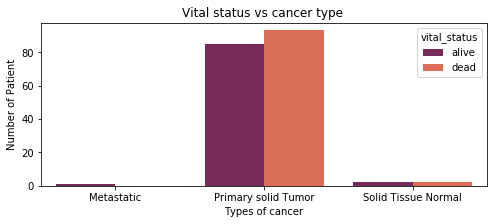

In [31]:
#Plotting Sample Type Vs Number of Patient Vs vital_status
sample_type_group = col_meta_data.groupby(['sample_type', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(8, 3))
sns.barplot(x='sample_type', y='counts', hue='vital_status', data=sample_type_group, palette="rocket")
plt.ylabel('Number of Patient')
plt.xlabel('Types of cancer')
plt.title('Vital status vs cancer type ')

Conclusion: Types of tumer not play role in current vital status of patient. There is 50-50 chance of patient are currently alive or dead

In [36]:
col_meta_data.adenocarcinoma_invasion.value_counts()

yes    182
no       1
Name: adenocarcinoma_invasion, dtype: int64

Approx every patient cancer grows and spreads into body cells.

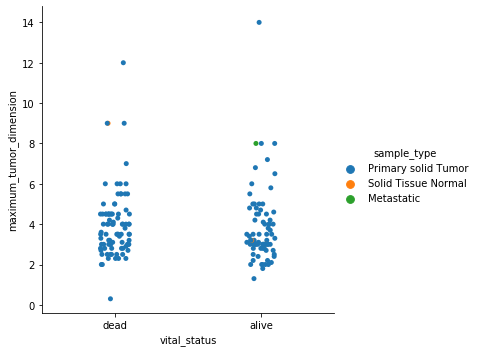

In [39]:
sns.catplot(x='vital_status', y='maximum_tumor_dimension', hue='sample_type', data=col_meta_data)

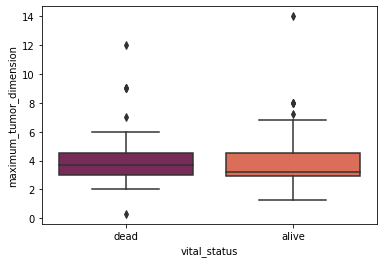

In [41]:
sns.boxplot(x='vital_status', y='maximum_tumor_dimension', data=col_meta_data, palette="rocket")

Conclusion: On average which has higher tumor dimension are most likely to dead.

In [42]:
#Exploring pathologic_stage
col_meta_data.pathologic_stage.value_counts()

stage iib    122
stage iia     29
stage ib      15
stage iv       5
stage ia       5
stage iii      4
stage i        1
Name: pathologic_stage, dtype: int64

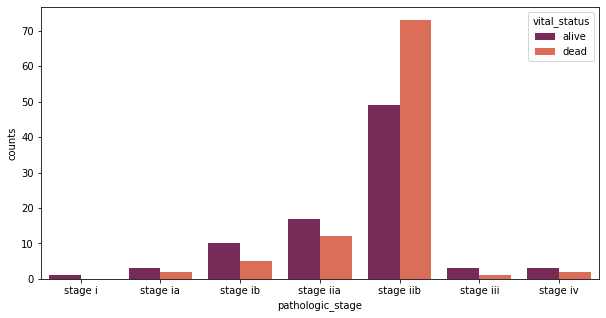

In [48]:
#Plotting pathologic_stage Vs vital_status
pathologic_stage_group = col_meta_data.groupby(['pathologic_stage', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_stage', y='counts', hue='vital_status', data=pathologic_stage_group, palette="rocket")

**pathologic stages are as follow:**
* **stage 0:** Abnormal cells are present but have not spread to nearby tissue.Data set have not this stage because approx all **adenocarcinoma_invasion ** value is True.
* **stage i**, **stage ii**,**stage iii** Cancer is present. The higher the number, the **larger the cancer tumor** and the more it has spread into nearby tissues.
* **stage iv** The cancer has spread to distant parts of the body.


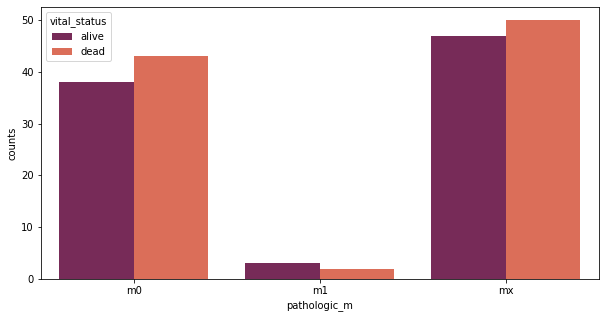

In [49]:
#Plotting pathologic_m Vs vital_status
pathologic_m_group = col_meta_data.groupby(['pathologic_m', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_m', y='counts', hue='vital_status', data=pathologic_m_group, palette="rocket")

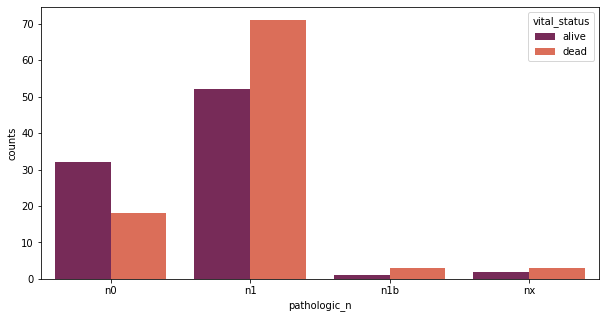

In [50]:
#Plotting pathologic_n Vs vital_status
pathologic_n_group = col_meta_data.groupby(['pathologic_n', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_n', y='counts', hue='vital_status', data=pathologic_n_group, palette="rocket")

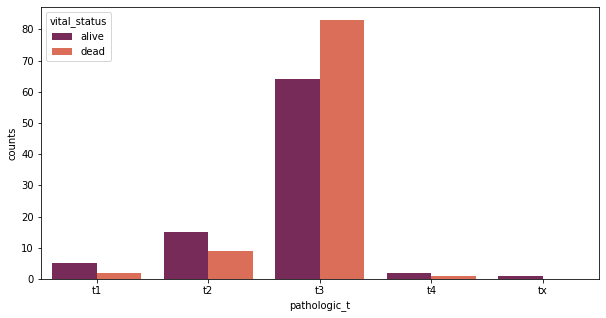

In [51]:
#Plotting pathologic_t Vs vital_status
pathologic_t_group = col_meta_data.groupby(['pathologic_t', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_t', y='counts', hue='vital_status', data=pathologic_t_group, palette="rocket")

* **The T refers** to the size and extent of the main tumor. The main tumor is usually called the primary tumor.
* **The N refers** to the the number of nearby lymph nodes that have cancer.
* **The M refers** to whether the cancer has metastasized. This means that the cancer has spread from the primary tumor to other parts of the body.
* majority of patient have **pathologic_t3** and **pathologic_n1** types stages.

###Exploring Row metadata


In [52]:
print(row_meta_data.index[:5])
print(row_meta_data.shape)
row_meta_data.head()

Index(['SLC35E2', 'A1BG', 'A1CF', 'A2BP1', 'A2LD1'], dtype='object', name='rid')
(18465, 0)


rhd
rid
SLC35E2
A1BG
A1CF
A2BP1
A2LD1


this rid show the types of RNA sequence(18465 different types of RNA seq).

###Exploring Data Matrix


In [0]:
my_data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,7.5,7.55,7.8,8.15,8.7,8.0,6.5,6.55,8.1,7.3,7.95,7.3,8.35,6.4,8.25,8.55,7.5,7.65,7.45,8.1,8.7,8.0,7.5,9.95,8.7,8.05,7.65,7.65,7.85,8.05,...,8.8,8.25,9.0,8.05,8.5,7.7,8.2,8.8,8.4,8.65,7.45,7.7,7.85,7.7,7.4,8.5,7.15,8.15,8.0,7.8,7.6,6.4,8.55,8.5,7.45,7.5,8.4,8.45,7.95,8.2,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,6.8,5.90,5.7,6.70,5.4,5.8,6.7,6.00,7.0,5.7,6.50,7.8,10.00,7.3,6.10,7.20,6.5,7.10,6.50,9.3,9.5,9.7,8.6,8.00,8.5,6.20,9.00,6.70,5.30,5.10,...,6.8,7.20,7.5,7.80,7.4,5.9,7.7,6.3,7.1,6.00,6.30,6.7,5.20,8.1,7.2,8.1,6.20,7.40,6.6,7.6,5.3,6.3,6.90,6.9,4.70,6.5,6.7,5.20,8.00,7.6,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,6.9,4.60,NaN,6.20,4.5,3.1,5.7,5.30,1.2,4.7,4.20,5.2,5.60,7.5,7.40,5.20,5.6,1.30,2.10,6.9,7.2,6.6,8.3,7.00,8.5,3.10,8.20,5.20,2.70,2.20,...,4.5,5.90,2.9,3.10,6.9,6.9,4.6,6.5,-1.2,0.90,7.00,6.0,4.20,5.4,5.3,1.1,6.20,5.80,6.7,4.9,7.2,4.4,6.40,4.8,7.00,6.4,6.0,5.30,5.60,5.4,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,1.6,0.70,-0.9,0.30,1.3,NaN,NaN,NaN,-0.1,1.3,NaN,NaN,NaN,0.3,1.10,1.50,NaN,1.00,-0.40,3.6,NaN,-0.8,-1.0,NaN,NaN,0.40,NaN,-1.30,NaN,NaN,...,NaN,0.40,-0.1,-1.00,3.7,1.8,-0.3,1.5,-1.2,NaN,0.00,-0.1,NaN,NaN,NaN,NaN,-0.50,-0.70,-1.2,0.1,0.7,-1.0,-0.90,NaN,6.60,0.6,0.4,-1.10,-0.70,1.0,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,7.1,7.70,6.4,6.50,6.9,6.0,8.2,8.40,6.4,7.1,6.40,8.1,6.60,7.7,7.10,7.50,6.0,6.50,7.30,6.3,6.7,5.5,6.4,5.50,3.8,6.60,4.40,7.00,6.80,6.80,...,6.6,6.80,6.8,6.70,6.7,6.2,6.8,7.2,5.3,7.30,8.20,7.7,6.60,8.0,7.5,6.9,6.40,7.00,6.7,7.3,7.5,6.8,7.00,7.1,6.70,7.4,7.1,7.40,6.80,6.1,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


Total 183 columns have missing value, and Total 134954 missing values in dataset


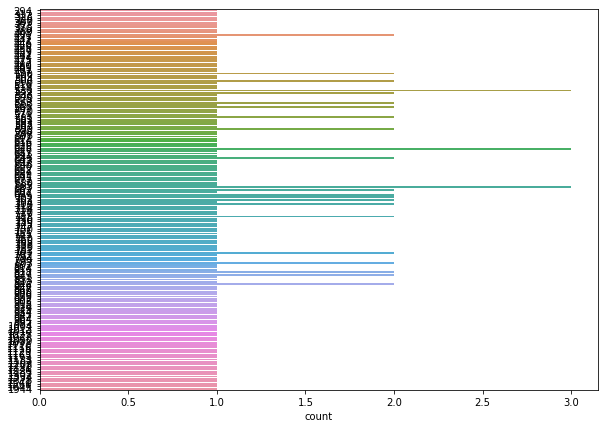

In [53]:
# Number of missing values in each column of my data
missing_val_count_by_column = (my_data.isnull().sum())
missing_val_count_by_col = missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False)
print(f"Total {len(missing_val_count_by_col)} columns have missing value, and",
      f"Total {my_data.isnull().sum().sum()} missing values in dataset")
plt.figure(figsize=(10, 7))
sns.countplot(data=missing_val_count_by_col, y= missing_val_count_by_col )

In [54]:
#Imputation of missing values
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_my_data = pd.DataFrame(my_imputer.fit_transform(my_data))

# Fill in the lines below: imputation removed column names; put them back
imputed_my_data.columns = my_data.columns
imputed_my_data.index = my_data.index

imputed_my_data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.200000,8.000000,7.65,8.100000,8.200000,8.2,7.55,8.450000,7.5,7.55,7.800000,8.15,8.7,8.000000,6.500000,6.550000,8.1,7.3,7.950000,7.300000,8.350000,6.4,8.25,8.55,7.50000,7.65,7.45,8.1,8.700000,8.0,7.5,9.950000,8.700000,8.05,7.650000,7.65,7.850000,8.050000,...,8.800000,8.25,9.0,8.05,8.5,7.7,8.2,8.8,8.4,8.650000,7.45,7.7,7.850000,7.700000,7.400000,8.500000,7.15,8.15,8.0,7.8,7.6,6.4,8.55,8.50000,7.45,7.5,8.4,8.45,7.95,8.2,8.45,7.95,8.3,8.050000,8.2,7.25,7.4,7.350000,7.2,9.050000
A1BG,6.40,5.8,6.400000,5.800000,6.70,6.600000,6.300000,6.5,5.70,6.300000,6.8,5.90,5.700000,6.70,5.4,5.800000,6.700000,6.000000,7.0,5.7,6.500000,7.800000,10.000000,7.3,6.10,7.20,6.50000,7.10,6.50,9.3,9.500000,9.7,8.6,8.000000,8.500000,6.20,9.000000,6.70,5.300000,5.100000,...,6.800000,7.20,7.5,7.80,7.4,5.9,7.7,6.3,7.1,6.000000,6.30,6.7,5.200000,8.100000,7.200000,8.100000,6.20,7.40,6.6,7.6,5.3,6.3,6.90,6.90000,4.70,6.5,6.7,5.20,8.00,7.6,7.10,7.10,6.7,7.000000,6.9,7.10,7.3,7.900000,6.0,6.900000
A1CF,4.70,5.7,3.000000,5.100000,4.40,4.200000,1.600000,6.8,6.00,7.431307,6.9,4.60,7.467205,6.20,4.5,3.100000,5.700000,5.300000,1.2,4.7,4.200000,5.200000,5.600000,7.5,7.40,5.20,5.60000,1.30,2.10,6.9,7.200000,6.6,8.3,7.000000,8.500000,3.10,8.200000,5.20,2.700000,2.200000,...,4.500000,5.90,2.9,3.10,6.9,6.9,4.6,6.5,-1.2,0.900000,7.00,6.0,4.200000,5.400000,5.300000,1.100000,6.20,5.80,6.7,4.9,7.2,4.4,6.40,4.80000,7.00,6.4,6.0,5.30,5.60,5.4,5.40,6.40,6.5,4.400000,3.3,3.60,6.2,1.200000,4.9,2.000000
A2BP1,-1.00,1.1,7.577068,7.728812,0.10,7.664174,7.628676,1.7,0.40,-1.500000,1.6,0.70,-0.900000,0.30,1.3,7.676605,7.795213,7.470156,-0.1,1.3,7.480417,7.652951,7.569822,0.3,1.10,1.50,7.52819,1.00,-0.40,3.6,7.691588,-0.8,-1.0,7.334601,7.412444,0.40,7.585991,-1.30,7.600843,7.545454,...,7.691609,0.40,-0.1,-1.00,3.7,1.8,-0.3,1.5,-1.2,7.584074,0.00,-0.1,7.564054,7.566644,7.539044,7.633615,-0.50,-0.70,-1.2,0.1,0.7,-1.0,-0

In [55]:
print(len(my_data.columns.unique()))
print(len(col_meta_data.index.unique()))


183
183


In [56]:
# Lets combine col_meta_data and my_data
col_to_merge = ['sample_type', 'mRNAseq_cluster','adenocarcinoma_invasion', 'vital_status', 'maximum_tumor_dimension', 'pathologic_stage', 'pathologic_m', 'pathologic_n', 'pathologic_t']
participant_id = col_meta_data.participant_id
target_variable = col_meta_data.sample_type
col_meta_data = col_meta_data.set_index('participant_id')
imputed_my_data = imputed_my_data.rename(columns=participant_id).T
#imputed_my_data = imputed_my_data.join(col_meta_data[col_to_merge])
imputed_my_data.head()

rid,SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,...,ZP3,ZPBP2,ZPLD1,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1,7.45,6.4,4.7,-1.000000,7.5,6.400000,14.3,10.6,8.8,1.000000,9.4,-1.000000,10.2,9.2,4.8,10.2,9.6,11.8,7.600244,8.6,8.9,11.3,8.6,7.5,8.1,10.6,10.0,9.4,4.4,5.8,1.8,7.4,1.000000,7.8,10.4,9.7,1.0,8.1,7.9,9.3,...,7.7,7.600244,3.9,9.4,9.4,5.5,8.1,4.0,7.2,6.9,9.1,1.5,6.0,8.0,7.3,3.4,8.7,7.1,0.5,6.0,0.5,8.6,7.1,8.8,8.2,8.8,8.1,7.0,8.6,8.1,8.6,6.2,9.0,9.9,7.600244,9.2,12.9,10.1,9.3,5.5
aab4,8.10,5.8,5.7,1.100000,6.8,7.639954,14.0,10.2,5.6,-1.200000,9.1,-0.200000,10.3,5.0,6.3,10.4,9.8,11.4,0.300000,8.4,8.7,11.6,9.0,7.5,8.2,10.2,8.1,9.3,4.9,5.7,6.3,4.9,3.000000,8.5,10.9,9.5,0.8,9.0,6.0,9.7,...,6.6,7.639954,5.7,9.6,10.2,5.4,7.9,5.0,7.0,6.1,9.8,3.1,6.0,7.6,6.2,3.7,8.5,7.5,-1.2,5.7,0.8,7.9,6.2,9.2,6.9,9.4,8.1,7.5,8.7,8.1,8.8,5.8,8.5,10.0,7.639954,9.3,12.4,9.8,8.9,4.5
aab6,7.20,6.4,3.0,7.577068,7.3,10.800000,13.1,10.1,0.2,0.200000,9.7,7.577068,9.2,2.8,5.9,9.9,9.8,11.1,2.200000,8.4,8.8,11.4,9.3,6.7,7.3,10.3,7.3,8.4,4.7,6.1,7.4,8.0,1.800000,9.2,10.6,8.0,4.1,7.7,5.7,10.4,...,7.8,7.577068,3.0,9.5,10.4,4.9,7.8,5.2,6.6,5.4,9.9,2.9,6.3,7.7,6.6,2.4,7.9,6.9,2.0,5.7,0.8,8.2,5.7,8.8,5.3,8.7,7.3,7.0,8.8,8.4,9.1,3.9,8.1,10.0,-0.800000,9.4,13.5,9.8,9.2,4.7
aab8,8.00,5.8,5.1,7.728812,7.5,4.100000,13.8,8.6,3.2,-0.100000,9.6,-0.100000,9.4,7.7,6.4,10.5,9.2,11.6,-0.100000,8.7,9.1,11.4,9.4,7.7,7.8,10.1,8.3,8.4,5.4,6.6,7.3,7.1,7.728812,9.0,10.0,7.9,5.2,7.6,6.7,10.4,...,6.6,7.728812,0.9,9.7,10.6,5.7,8.0,6.0,7.6,6.5,9.2,0.9,5.9,7.1,6.8,4.0,8.9,7.4,4.2,6.1,2.5,8.0,6.1,9.8,6.3,8.8,8.0,7.4,8.6,8.6,8.9,5.2,8.5,9.7,1.900000,9.4,12.5,9.7,9.3,6.4
aab9,7.65,6.7,4.4,0.100000,7.4,9.300000,14.6,10.1,5.7,7.796027,9.8,7.796027,9.3,7.0,6.5,10.1,9.8,11.2,0.100000,8.4,9.3,11.4,9.4,7.2,8.3,10.3,8.6,9.4,5.9,6.2,6.1,6.0,1.700000,8.7,10.0,9.3,3.3,8.8,7.7,9.2,...,8.1,0.100000,4.9,9.7,9.7,4.8,8.1,5.1,7.3,6.2,10.1,2.4,5.7,7.9,7.0,4.3,8.6,8.0,1.7,6.1,0.1,8.4,7.0,9.9,6.9,8.6,8.0,7.0,8.9,8.2,8.4,5.9,8.6,9.9,0.100000,9.3,13.0,10.1,9.2,4.9


In [57]:
for col in col_to_merge:
    imputed_my_data[col] = col_meta_data[col]
imputed_my_data.head(2)

rid,SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,...,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,sample_type,mRNAseq_cluster,adenocarcinoma_invasion,vital_status,maximum_tumor_dimension,pathologic_stage,pathologic_m,pathologic_n,pathologic_t
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1,7.45,6.4,4.7,-1.0,7.5,6.400000,14.3,10.6,8.8,1.0,9.4,-1.0,10.2,9.2,4.8,10.2,9.6,11.8,7.600244,8.6,8.9,11.3,8.6,7.5,8.1,10.6,10.0,9.4,4.4,5.8,1.8,7.4,1.0,7.8,10.4,9.7,1.0,8.1,7.9,9.3,...,6.9,9.1,1.5,6.0,8.0,7.3,3.4,8.7,7.1,0.5,6.0,0.5,8.6,7.1,8.8,8.2,8.8,8.1,7.0,8.6,8.1,8.6,6.2,9.0,9.9,7.600244,9.2,12.9,10.1,9.3,5.5,Primary solid Tumor,1.0,yes,dead,4.5,stage iib,m0,n1,t3
aab4,8.10,5.8,5.7,1.1,6.8,7.639954,14.0,10.2,5.6,-1.2,9.1,-0.2,10.3,5.0,6.3,10.4,9.8,11.4,0.300000,8.4,8.7,11.6,9.0,7.5,8.2,10.2,8.1,9.3,4.9,5.7,6.3,4.9,3.0,8.5,10.9,9.5,0.8,9.0,6.0,9.7,...,6.1,9.8,3.1,6.0,7.6,6.2,3.7,8.5,7.5,-1.2,5.7,0.8,7.9,6.2,9.2,6.9,9.4,8.1,7.5,8.7,8.1,8.8,5.8,8.5,10.0,7.639954,9.3,12.4,9.8,8.9,4.5,Primary solid Tumor,2.0,yes,alive,6.8,stage iib,m0,n1,t2


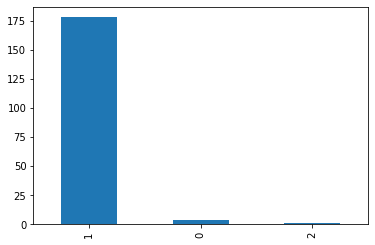

In [58]:
def cat_to_numeric(x):
    if x=='Solid Tissue Normal':
        return 0
    elif x=='Primary solid Tumor':
        return 1
    else:
        return 2
target_variable = target_variable.map(lambda x: cat_to_numeric(x))
target_variable.value_counts().plot(kind='bar')

In [59]:
def remove_nulls(df):

    rows = df.shape[0]
    columns = df.shape[1]
    null_cols = 0
    list_of_nulls_cols = []
    for col in list(df.columns):
        null_values_rows = df[col].isnull().sum()
        null_rows_pcn = round(((null_values_rows)/rows)*100, 2)
        col_type = df[col].dtype
        if null_values_rows > 0:
            print("The column {} has {} null values. It is {}% of total rows.".format(col, null_values_rows, null_rows_pcn))
            print("The column {} is of type {}.\n".format(col, col_type))
            null_cols += 1
            list_of_nulls_cols.append(col)
            df[[col]] = df[[col]].apply(lambda x: x.fillna(method='backfill'))
            print(f"The column {col} has removed {null_values_rows} null values")
    null_cols_pcn = round((null_cols/columns)*100, 2)
    print("The DataFrame has {} columns with null values. It is {}% of total columns.".format(null_cols, null_cols_pcn))
    return df

my_data = remove_nulls(imputed_my_data.select_dtypes(exclude='object'))

The column mRNAseq_cluster has 5 null values. It is 2.73% of total rows.
The column mRNAseq_cluster is of type float64.

The column mRNAseq_cluster has removed 5 null values
The column maximum_tumor_dimension has 14 null values. It is 7.65% of total rows.
The column maximum_tumor_dimension is of type float64.

The column maximum_tumor_dimension has removed 14 null values
The DataFrame has 2 columns with null values. It is 0.01% of total columns.


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [60]:
imputed_my_data.isnull().sum().sum()

23

In [0]:

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(imputed_my_data.drop(columns=col_to_merge))

from sklearn.decomposition import PCA as sklearnPCA
n_components = 100
sklearn_pca = sklearnPCA(n_components=n_components)
Y_sklearn = sklearn_pca.fit_transform(X_std)

### What can be said about the variance of the PCA?

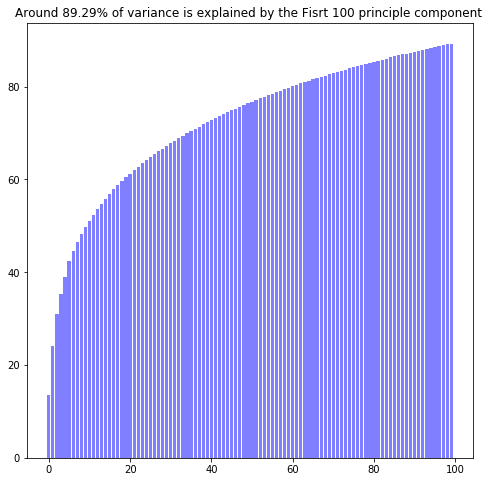

In [63]:
cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

explained_var = round(sklearn_pca.explained_variance_ratio_.sum()*100, 2)

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(n_components), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title(f"Around {explained_var}% of variance is explained by the Fisrt {n_components} principle component ");

### Visualize the data whole data using PCA.

[]

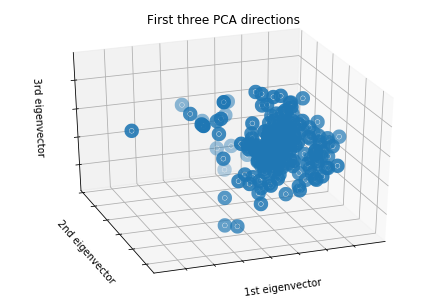

In [64]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_reduced  = sklearn_pca.fit_transform(X_std)
Y=target_variable
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

Text(0.5, 1.0, 'This The 2D Transformation of above graph ')

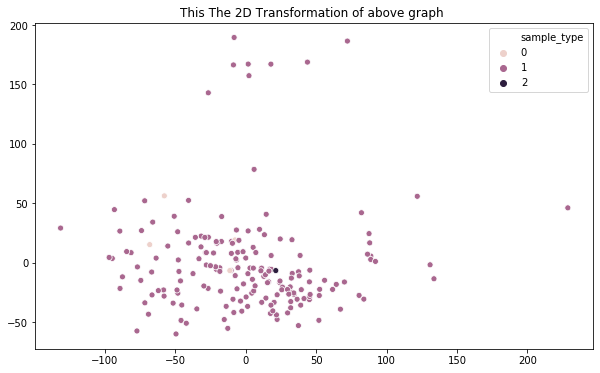

In [65]:
fig = plt.figure(1, figsize=(10,6))
sns.scatterplot(X_reduced[:, 0],  X_reduced[:, 1],hue=Y)
plt.title("This The 2D Transformation of above graph ")

the neuroendocrine tumors clearly not separable from the adenocarcinoma tumors?

Lets Remove the neuroendocrine tumors from the dataset so that it contains only the adenocarcinoma tumor samples. The histology for the different tumor samples is contained in the my_data.

In [67]:
imputed_my_data = imputed_my_data[imputed_my_data['adenocarcinoma_invasion']=='yes']
imputed_my_data.shape

(182, 18474)

**Interferons (IFNs)** are a group of signaling proteins made and released by host cells in response to the presence of several pathogens, such as viruses, bacteria, parasites, and also tumor cells. Type I interferons (IFNs) are a large subgroup of interferon proteins that help regulate the activity of the immune system. The genes responsible for type 1 Interferons is called Type 1 IFN signature and consists a set of 25 genes in homo sapiens.

Let's read these 25 IFN signature

In [68]:
ifn_sig = pd.read_csv('type1_IFN.txt', header=None)
ifn_sig.columns = ['member']
ifn_sig.head()

,member
0,IFIT1
1,IFI44
2,IFIT3
3,MX2
4,OAS1


In [69]:
ifn_sig_data = imputed_my_data[ifn_sig['member'].to_list()]
ifn_sig_data.shape

(182, 25)

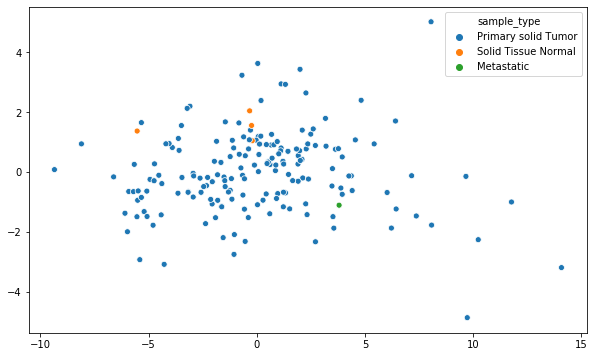

In [70]:
X_std = StandardScaler().fit_transform(ifn_sig_data)
n_components = 2
sklearn_pca = sklearnPCA(n_components=n_components)
X_reduced  = sklearn_pca.fit_transform(X_std)
fig = plt.figure(1, figsize=(10,6))
sns.scatterplot(X_reduced[:, 0],  X_reduced[:, 1],hue=imputed_my_data['sample_type'])


In [71]:
!pip install gsva
from GSVA import gsva
from plotnine import *
from sklearn.manifold import TSNE

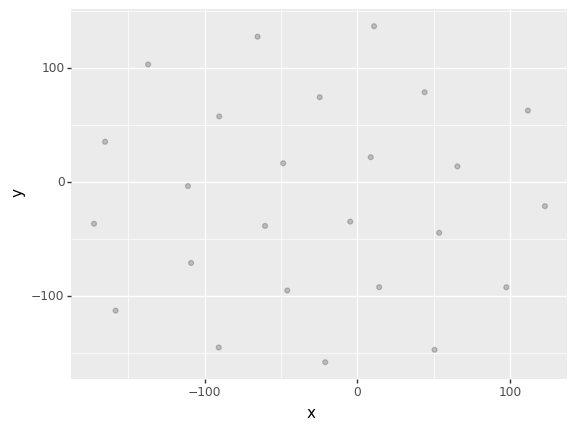

<ggplot: (8788299079018)>

In [72]:
XV = TSNE(n_components=2).\
    fit_transform(ifn_sig_data.T)
df = pd.DataFrame(XV).rename(columns={0:'x',1:'y'})
(ggplot(df,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)